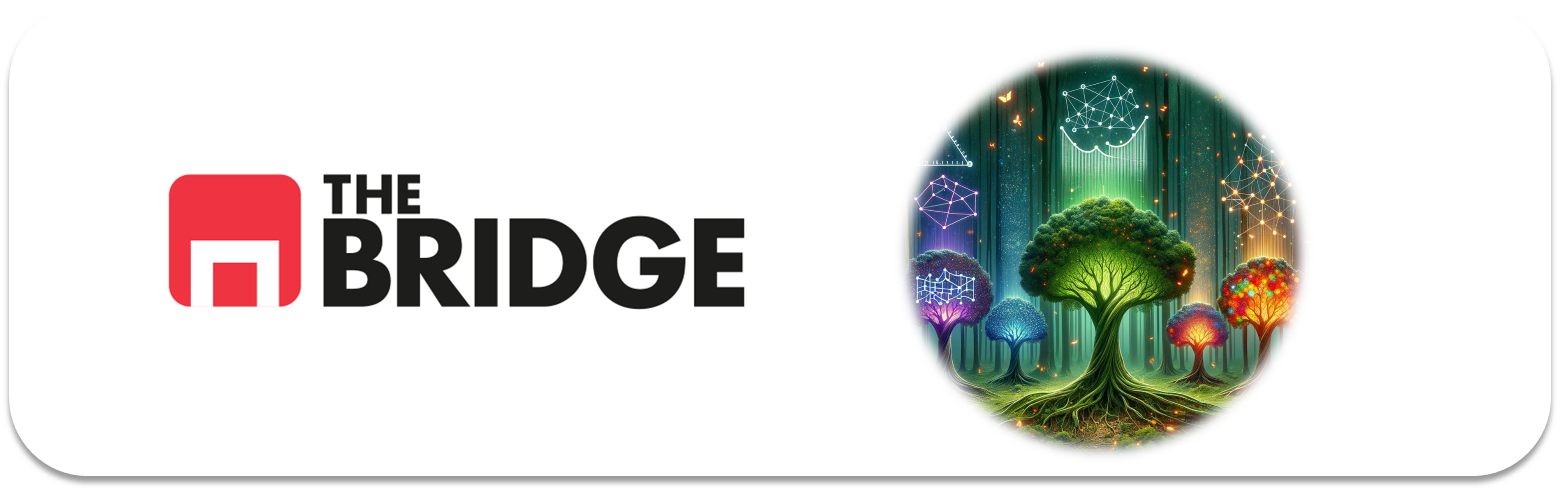

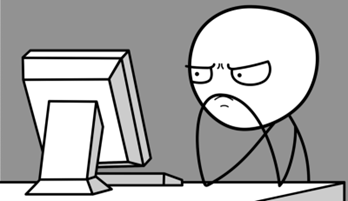

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import sklearn

# para que la salida de este notebook sea estable en todas las ejecuciones
np.random.seed(42)

# Pintar!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

In [2]:
from sklearn.datasets import make_moons

# Generar el dataset
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Comprobamos dimensiones
print("Shape de X_moons:", X_moons.shape)
print("Shape de y_moons:", y_moons.shape)

Shape de X_moons: (10000, 2)
Shape de y_moons: (10000,)


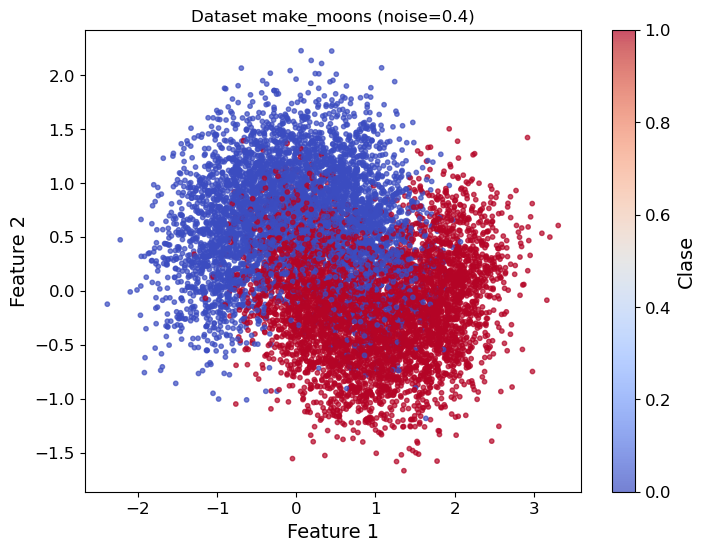

In [3]:
plt.figure(figsize=(8,6))

plt.scatter(
    X_moons[:, 0],     # primera feature
    X_moons[:, 1],     # segunda feature
    c=y_moons,         # colorear según la clase
    cmap="coolwarm",
    s=10,              # tamaño de puntos
    alpha=0.7
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset make_moons (noise=0.4)")
plt.colorbar(label="Clase")
plt.show()

In [5]:
import seaborn as sns

<Axes: >

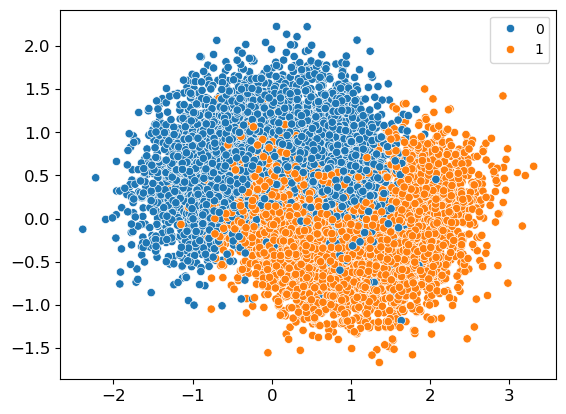

In [6]:
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [7]:
from sklearn.model_selection import train_test_split

# División 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_moons,
    y_moons,
    test_size=0.2,
    random_state=42,
    stratify=y_moons  # mantiene proporción de clases
)

# Comprobamos tamaños
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (8000, 2)
X_test: (2000, 2)
y_train: (8000,)
y_test: (2000,)


### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo con valores por defecto
tree_clf = DecisionTreeClassifier()

print(tree_clf)

DecisionTreeClassifier()


Eso crea un clasificador con los parámetros estándar, entre ellos:

criterion='gini' (impureza de Gini)

splitter='best'

max_depth=None (el árbol crece hasta que las hojas sean puras o no pueda dividir más)

min_samples_split=2

min_samples_leaf=1

Es decir, sin restricciones: el árbol crecerá todo lo posible, lo que en un dataset como make_moons con noise=0.4 probablemente llevará a sobreajuste.

Si quieres, en el siguiente paso lo entrenamos y vemos su rendimiento en train y test para comprobarlo.

### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [9]:
from sklearn.metrics import classification_report


# Entrenar
tree_clf.fit(X_train, y_train)

# Predicciones sobre test
y_pred = tree_clf.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.80      0.80      0.80      1000

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_clf_restricted = DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=15,
    random_state=42
)

print(tree_clf_restricted)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=42)


max_depth limita cuántas decisiones consecutivas puede hacer el modelo.

max_leaf_nodes limita cuántas regiones finales puede crear.

En datasets como make_moons con ruido, estas restricciones suelen:

Bajar ligeramente el accuracy en train.

Mejorar el rendimiento en test.

Reducir el sobreajuste.

### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [11]:
from sklearn.metrics import classification_report

# Entrenar el árbol con restricciones
tree_clf_restricted.fit(X_train, y_train)

# Predicciones en test
y_pred_restricted = tree_clf_restricted.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred_restricted))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

In [12]:
# Extra
train_score_full = tree_clf.score(X_train, y_train)
test_score_full = tree_clf.score(X_test, y_test)

# Árbol restringido
train_score_restricted = tree_clf_restricted.score(X_train, y_train)
test_score_restricted = tree_clf_restricted.score(X_test, y_test)

print("Árbol sin restricciones")
print("Train accuracy:", train_score_full)
print("Test accuracy:", test_score_full)

print("\nÁrbol restringido (max_depth=5, max_leaf_nodes=15)")
print("Train accuracy:", train_score_restricted)
print("Test accuracy:", test_score_restricted)

Árbol sin restricciones
Train accuracy: 1.0
Test accuracy: 0.798

Árbol restringido (max_depth=5, max_leaf_nodes=15)
Train accuracy: 0.85975
Test accuracy: 0.854


### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase ShuffleSplit de sklearn para ayudarte con esto



In [17]:
from sklearn.model_selection import ShuffleSplit
import numpy as np

# Definimos el generador de splits
n_subsets = 1000
subset_size = 100

shuffle_split = ShuffleSplit(
    n_splits=n_subsets,
    train_size=subset_size,
    random_state=42
)

# Lista para guardar los subconjuntos
X_subsets = []
y_subsets = []

# Generamos los subconjuntos
for train_index, _ in shuffle_split.split(X_train):
    X_subsets.append(X_train[train_index])
    y_subsets.append(y_train[train_index])

# Comprobación
print("Número de subconjuntos:", len(X_subsets))
print("Shape de un subconjunto:", X_subsets[0].shape)

Número de subconjuntos: 1000
Shape de un subconjunto: (100, 2)


### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [14]:
from sklearn.tree import DecisionTreeClassifier

forest = []

for X_subset, y_subset in zip(X_subsets, y_subsets):
    
    tree = DecisionTreeClassifier(
        max_depth=5,
        max_leaf_nodes=15,
        random_state=42
    )
    
    tree.fit(X_subset, y_subset)
    
    forest.append(tree)

print("Número de árboles en el bosque:", len(forest))


Número de árboles en el bosque: 1000


### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [15]:
from sklearn.metrics import accuracy_score
import numpy as np

accuracies = []

for tree in forest:
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

mean_accuracy = np.mean(accuracies)

print("Accuracy medio de los 1000 árboles:", mean_accuracy)
print("Desviación estándar:", np.std(accuracies))

Accuracy medio de los 1000 árboles: 0.8076414999999999
Desviación estándar: 0.0266926062374958


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Lista donde guardaremos las 1000 predicciones
predicciones = []

for X_sub, y_sub in zip(X_subsets, y_subsets):
    # Entrenar un árbol con el subconjunto
    arbol = DecisionTreeClassifier()
    arbol.fit(X_sub, y_sub)

    # Predecir sobre X_test
    preds = arbol.predict(X_test)

    # Guardar las predicciones
    predicciones.append(preds)

# Comprobación
print("Número de listas de predicciones:", len(predicciones))
print("Longitud de cada predicción:", len(predicciones[0]))


Número de listas de predicciones: 1000
Longitud de cada predicción: 2000


### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [21]:
import numpy as np
from scipy.stats import mode

# Convertimos la lista de predicciones en un array de shape (1000, n_test)
pred_array = np.array(predicciones)

# Calculamos la moda a lo largo del eje 0 (cada columna es una instancia de X_test)
votos_finales = mode(pred_array, axis=0, keepdims=False).mode

print("Shape de la predicción final:", votos_finales.shape)


Shape de la predicción final: (2000,)


In [23]:
# Ejemplo de votación para la primera instancia de X_test
Y_pred_consejo = []
votos_0 = 0
votos_1 = 0
for i in range(1000):
    if predicciones_list[i][0] == 0:
        votos_0 += 1
    else:
        votos_1 += 1

if votos_0 > votos_1:
    Y_pred_consejo.append(0)
else:
    Y_pred_consejo.append(1)

NameError: name 'predicciones_list' is not defined

### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, votos_finales)
print("Accuracy del consejo de árboles:", accuracy)


Accuracy del consejo de árboles: 0.864
